In [24]:
import numpy as np
import matplotlib.pyplot as plt    
import csv
from scipy.optimize import curve_fit
import math as math

Чтение координат из файла и занесение результатов в два списка (x и y координаты точек):

In [31]:
Nx=[]
Ny=[]
def csv_dict_reader(file_obj):
    """
    Read a CSV file using csv.DictReader
    """
    reader = csv.DictReader(file_obj, delimiter=' ')
    for line in reader:
        Nx.append(float(line["x"])),
        Ny.append(float(line["y"])),
 
if __name__ == "__main__":
    with open("lab1.csv") as f_obj:
        csv_dict_reader(f_obj)

Сортировка координат по возрастанию значения x-состовляющей:

In [8]:
Nxy = zip(Nx,Ny)        
Nxys = sorted(Nxy, key=lambda tup: tup[0])    
Nx1 = [Nxy[0] for Nxy in Nxys]
Ny1 = [Nxy[1] for Nxy in Nxys]

Построение линейно-кусочного графика по точкам из csv файла:

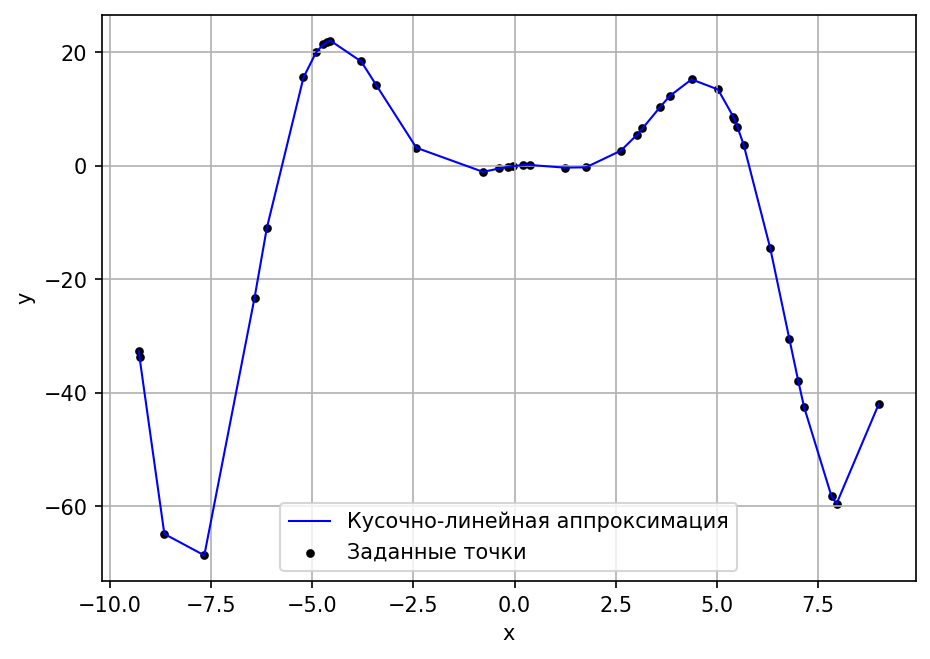

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 5), dpi=150)

axes.set_xlabel("x")
axes.set_ylabel("y")

axes.plot(Nx1, Ny1, color="blue", linewidth=1.0, linestyle="-", label="Кусочно-линейная аппроксимация")
plt.scatter(Nx1, Ny1,s = 10, color="black", label="Заданные точки")

axes.grid()
axes.legend()

plt.show()

Далее для нахождения аппроксимирующей функции, было решено полученные точки ввести в программу MS Excel. По данным точкам программа построила на графике линию тренда и вывела её формулу, самой реалистичной оказалась полиномиальная линия 6-ой степени.

**y = 0,0011x^6 - 0,0007x^5 - 0,1412x^4 + 0,0937x^3 + 3,522x^2 - 2,2909x - 5,0303** 


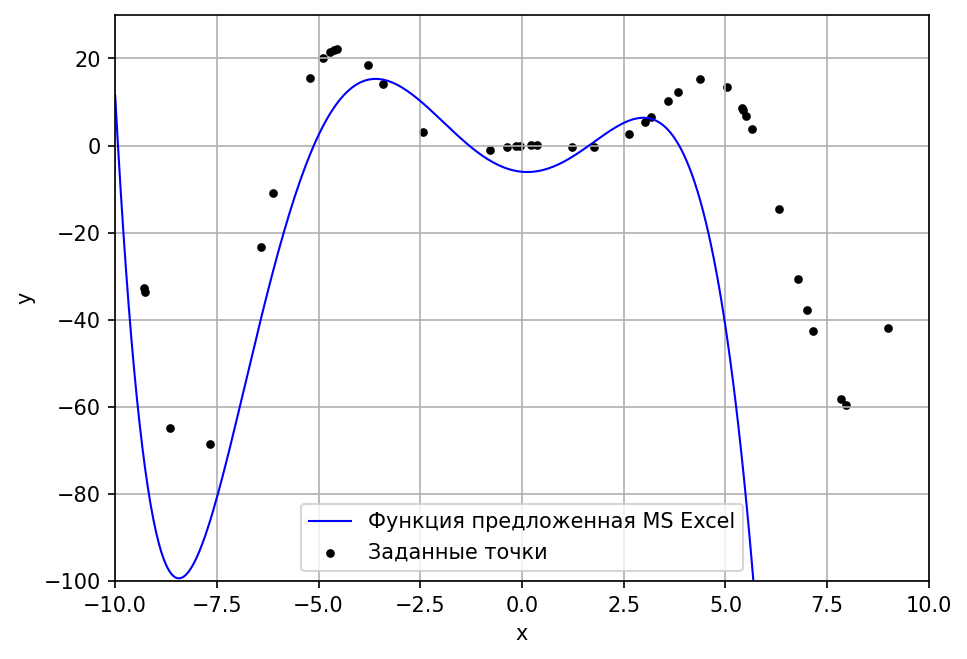

In [36]:
def func (x_e):
    return (0.0011*x_e**6 - 0.0007*x_e**5 - 0.1412*x_e**4 + 0.0937*x_e**3 + 3.522*x_e**2 - 2.2909**x_e - 5.0303)

x_ex = np.linspace(-10,10,300)
y_ex = func(x_ex)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(7, 5), dpi=150)
plt.axis([-10, 10, -100, 30])
axes.plot(x_ex, y_ex, color="blue", linewidth=1.0, linestyle="-", label="Функция предложенная MS Excel") 
plt.scatter(Nx1, Ny1,s = 10, color="black", label="Заданные точки")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.grid()
axes.legend()
plt.show()

Данная функция не будет дальше рассматриваться и оптимизироваться, так как сильно отклонена от заданных точек и её порядок слишком велик.

Проанализировав полученную кусочно-линейную аппроксимацию и результаты MS Excel, было принято решение рассматривать фунцию, содержащую в себе косинус-составляющую. 
Далее будем рассматривать в качестве аппроксимирующей функцию **f(x) = (-ax^2+bx+c)cos(dx)**

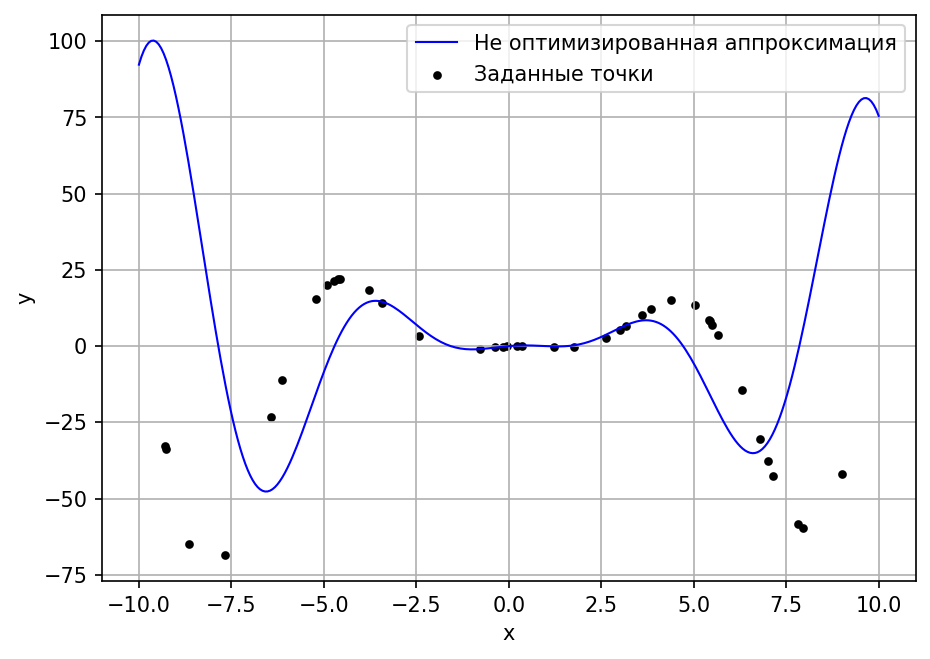

In [28]:
x_func = np.linspace(-10,10,300)
y_func = ( - x_func**2 + x_func ) * np.cos(x_func)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(7, 5), dpi=150)
axes.plot(x_func, y_func, color="blue", linewidth=1.0, linestyle="-", label="Не оптимизированная аппроксимация") 
plt.scatter(Nx1, Ny1,s = 10, color="black", label="Заданные точки")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.grid()
axes.legend()
plt.show()

Используя пакет математических процедур SciPy найдём оптимальные параметры аппроксимирующей функции:

In [20]:
def func (Nx1,a,b,c,d):
    return (-a*Nx1**2+b*Nx1+c)*np.cos(d*Nx1)

values = curve_fit(func,Nx1,Ny1)[0]
a = values[0]
b = values[1]
c = values[2]
d = values[3]
print('Значения параметров:')
print('a =', a)
print('b =', b)
print('c =', c)
print('d =', d)

Значения параметров:
a = 1.0600000002485312
b = 0.8499999999574979
c = 1.2488354554836607e-08
d = 0.8100000000044402


 Таким образом, получаем: **f(x) = (-1.06x^2+0.85x+1.25e-08)cos(0.81x)**

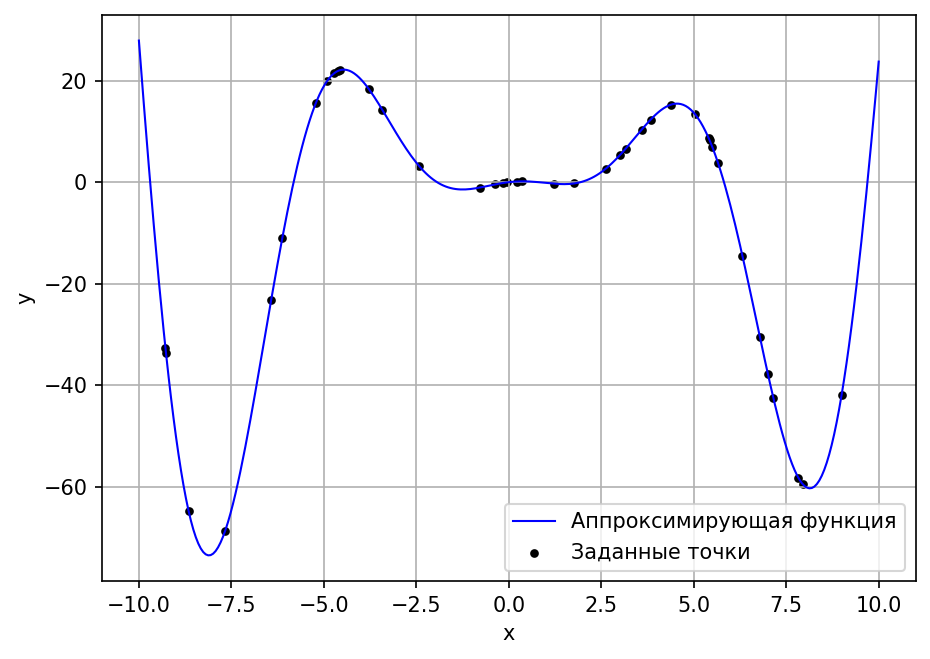

In [29]:
x_opt = np.linspace(-10,10,300)
y_opt = func(x_opt,a,b,c,d)

fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(7, 5), dpi=150)
axes.plot(x_opt, y_opt, color="blue", linewidth=1.0, linestyle="-", label="Аппроксимирующая функция") 
plt.scatter(Nx1, Ny1,s = 10, color="black", label="Заданные точки")
axes.set_xlabel("x")
axes.set_ylabel("y")
axes.grid()
axes.legend()
plt.show()

In [25]:
standard_deviation = math.sqrt(sum([(Ny1[i] - func(Nx1[i], a, b, c, d)) ** 2 for i in range(len(Nx1))])/len(Nx1))
print(f"Среднеквадратичное отклонение = {standard_deviation}")
max_deviation = max([abs(Ny1[i] - func(Nx1[i], a, b, c, d)) for i in range(len(Nx1))])
print(f"Максимальное отклонение = {max_deviation}")

Среднеквадратичное отклонение = 6.422457443997763e-09
Максимальное отклонение = 1.2482730286922372e-08


Анализируя полученные отклонения, можно с уверенностью сказать, что оптимизированная функция найдена с довольно высокой точностью.